Author: Abdelmalik Moujahid -- abdelmalik.moujahid@uc3m.es

Date: February 15, 2017

<b> Solved by: Alessandro La Corte </b>
<br/>
<b> Email: 100355025@alumnos.uc3m.es </b>


# Machine Learning

## Session #2: Linear and Nonlinear SVM

The aim of this session is to get familiar with the SVM implementation of scikit-learn. 
The documentation can be found at <a href = http://scikit-learn.org/stable/modules/svm.html>  scikit-learn.org/stable/modules/svm.html</a>




## Required packages:

    * numpy
    * matpltlib.pyplot
    * sklearn (svm, cross_validation.train_test_split)
    
    

The iPython Notebook should be sent using the assignment activity module (See Aula Global). The deadline for submitting your reports ends on **February 22**. **The iPython Notebook should indicate your names and your email address**. 


### 1. Linear SVM

a) Generate a two-dimensional linearly separable dataset with 300 samples. We consider a two-class balanced classification problem. The samples from the first class are normally distributed with $\mu=0$ and $\sigma=1.5$, while the samples from the second class have $\mu=3$ and $\sigma=1.5$. 

    * Use a Scatter plot to show the data in a two-dimensional space and give a different color to each class. 
    
b) Fit a linear SVC using part of the data in X as training set (X_train, y_train) and holding out part of the available data as a test set (X_test, y_test). 

c) Get and plot the separating hyperplane and the parallels to the separating hyperplane that pass through the support vectors. How about the number of support vectors?

d) Compute the classification scores both on training and test sets.

e) Fit the model for different values of the penalty parameter C (from very low values to very high ones). Study the influence of this parameter on the classification score and on the number of support vectors. Why the margin is larger for low values of C than it is for higher values?


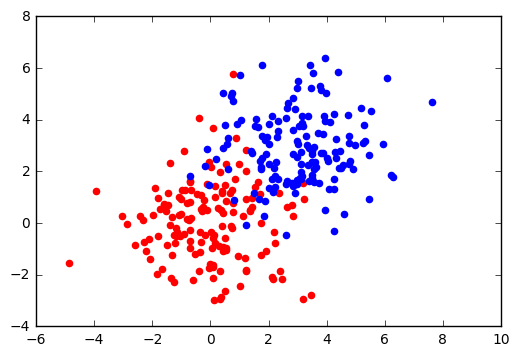

In [1]:

#imports
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#Define mu and sigma for each class
mu1    = 0
sigma1 = 1.5
mu2    = 3
sigma2 = 1.5

#Generate a random gaussian (normal) distributed class 
class1 = np.random.normal(mu1, sigma1, size=(150,2))
class2 = np.random.normal(mu2, sigma2, size=(150,2))

#Create the first and second class
c1 = np.ones(150)
c2 = c1 +1

#Concatenate class1 with ones
class1 = np.column_stack( (class1, c1))
class2 = np.column_stack( (class2, c2) )

#Concatenate classes
data = np.concatenate( (class1, class2) )

# Plot the classes
plt.scatter( class1[:,0], class1[:,1], color = "red" )
plt.scatter( class2[:,0], class2[:,1], color = "blue")
plt.show()

In [11]:
# Fit a linear SVC using part of the data in X as training set (X_train, y_train) 
#  and holding out part of the available data as a test set (X_test, y_test).

#Imports
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn import metrics

np.random.seed(42)

#Get the X matrix and y vector
X = data[:,0:2] 
y = data[:,2] 

#Obtain the train and test set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=42)

#Apply SVC
clf = SVC(kernel="linear")

clf = clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print "Using MAE the error is: {} ".format(metrics.mean_squared_error(y_test, y_test_pred))


Using MAE the error is: 0.1 


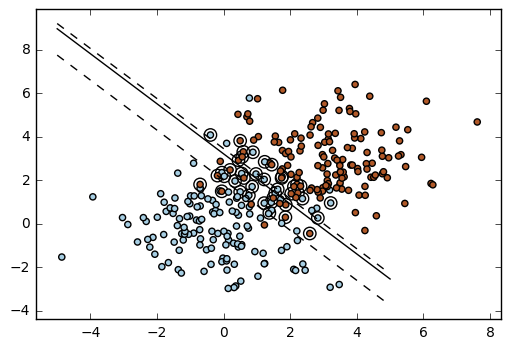

Number of support vectors for class1 and class2 respectively [20 21]


In [12]:
import pylab as pl

#Get and plot the separating hyperplane and the parallels to the separating hyperplane that pass through
# the support vectors. How about the number of support vectors?

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# # plot the parallels to the separating hyperplane that pass through the
# # support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# # plot the line, the points, and the nearest vectors to the plane
pl.set_cmap(pl.cm.Paired)
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=y)

pl.axis('tight')
pl.show()

print "Number of support vectors for class1 and class2 respectively {}".format(clf.n_support_)

In [13]:
#Compute the classification scores both on training and test sets.

print "The score of the train set is {}".format(clf.score(X_train,y_train))
print "The score of the test set is {}".format(clf.score(X_test,y_test))

The score of the train set is 0.914285714286
The score of the test set is 0.9


In [14]:
#Fit the model for different values of the penalty parameter C 
#  (from very low values to very high ones). 
#   Study the influence of this parameter on the classification score and on the number of support vectors. 
#     Why the margin is larger for low values of C than it is for higher values?

c_values = [0.00001, 0.0001, 0.1, 100, 10000]

for i in c_values:
    clf = SVC(kernel="linear", C=i)
    clf = clf.fit(X_train, y_train)
    score_train = clf.score(X_train,y_train)
    score_test  = clf.score(X_test,y_test)
    print "The score of the train set with c = {} is {}".format(i, score_train)
    print "The score of the test set with c = {} is {}".format(i, score_test)
    print ""
    
    

The score of the train set with c = 1e-05 is 0.514285714286
The score of the test set with c = 1e-05 is 0.466666666667

The score of the train set with c = 0.0001 is 0.514285714286
The score of the test set with c = 0.0001 is 0.466666666667

The score of the train set with c = 0.1 is 0.904761904762
The score of the test set with c = 0.1 is 0.888888888889

The score of the train set with c = 100 is 0.914285714286
The score of the test set with c = 100 is 0.9

The score of the train set with c = 10000 is 0.914285714286
The score of the test set with c = 10000 is 0.9



<i> Why the margin is larger for low values of C than it is for higher values? </i>
</br>

The parameter C is a penalty factor. A high C penalizes nonseparable points and it can be stored many support vectors and overfit. If C is too small, we may have underfitting. 

C is the soft margin constant. A low C is a soft margin while a high C is a hard margin. 

### 2. Nonlinear SVM

a) Generate a two-dimensional non-linearly separable dataset with 300 samples. For that, start from a two-dimensional array (X) of normally distributed data and get a target vector (y) using the logical XOR operator. 

b) Visualize the data using a scatter plot and give a different color to each class. 

c) Fit a RBF kernel SVC using the default parameters. Plot the decision function for each datapoint (you can take as baseline the function plot_svm_nonlinear.py from <a href = http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html> scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html</a>)

d) Study how the kernel parameter $\gamma$ and the penalty parameter C affect the shape of the decision function. Tune these parameters to obtain:
    * A decision boundary almost linear
    * A very sharp decision boundary
    * A curved, smooth decision boundary
    
e) Fit a Polynomial kernel SVC with degreees 1, 2, 3, 4. Interprete the results.


In [ ]:
#TO DELETE

#Generate a random gaussian (normal) distributed class 
# class1 = np.random.normal(size=(150,2))
# class2 = np.random.normal(size=(150,2))

# #Obtain a y vector using xor
# myfunc = lambda k : True if k > 0 else False 

# vfun = np.vectorize(myfunc)

# non_linear_bool1  = vfun(class1)
# non_linear_bool2  = vfun(class2)

# y1 = np.logical_xor(non_linear_bool1[:,0], non_linear_bool1[:,1])
# y2 = np.logical_xor(non_linear_bool2[:,0], non_linear_bool2[:,1])

# #Concanate results
# class1 = np.column_stack( (class1, y1) )
# class2 = np.column_stack( (class2, y2) )

# print class1
# print "\n"
# print class2

In [2]:
#Generate a two-dimensional non-linearly separable dataset 
#  with 300 samples.

import numpy as np

np.random.seed(42)

#Generate a random gaussian (normal) distributed class 
non_linear = np.random.normal(size=(300,2))

# Obtain a y vector using xor
myfunc = lambda k : True if k > 0 else False 

vfun = np.vectorize(myfunc)

non_linear_bool  = vfun(non_linear)

y = np.logical_xor(non_linear_bool[:,0], non_linear_bool[:,1])

non_linear = np.column_stack( (non_linear, y) )

print non_linear

[[ 0.49671415 -0.1382643   1.        ]
 [ 0.64768854  1.52302986  0.        ]
 [-0.23415337 -0.23413696  0.        ]
 [ 1.57921282  0.76743473  0.        ]
 [-0.46947439  0.54256004  1.        ]
 [-0.46341769 -0.46572975  0.        ]
 [ 0.24196227 -1.91328024  1.        ]
 [-1.72491783 -0.56228753  0.        ]
 [-1.01283112  0.31424733  1.        ]
 [-0.90802408 -1.4123037   0.        ]
 [ 1.46564877 -0.2257763   1.        ]
 [ 0.0675282  -1.42474819  1.        ]
 [-0.54438272  0.11092259  1.        ]
 [-1.15099358  0.37569802  1.        ]
 [-0.60063869 -0.29169375  0.        ]
 [-0.60170661  1.85227818  1.        ]
 [-0.01349722 -1.05771093  0.        ]
 [ 0.82254491 -1.22084365  1.        ]
 [ 0.2088636  -1.95967012  1.        ]
 [-1.32818605  0.19686124  1.        ]
 [ 0.73846658  0.17136828  0.        ]
 [-0.11564828 -0.3011037   0.        ]
 [-1.47852199 -0.71984421  0.        ]
 [-0.46063877  1.05712223  1.        ]
 [ 0.34361829 -1.76304016  1.        ]
 [ 0.32408397 -0.38508228

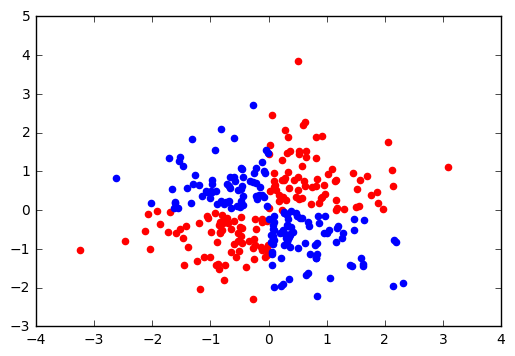

In [3]:
# Visualize the data using a scatter plot and give a 
#  different color to each class.

# Obtain the classes
class1 = non_linear[(non_linear[:,2]==0 )]  
class2 = non_linear[non_linear[:,2]==1]

# Plot the classes
plt.scatter( class1[:,0], class1[:,1], color = "red" )
plt.scatter( class2[:,0], class2[:,1], color = "blue")
plt.show()

In [ ]:
#  Fit a RBF kernel SVC using the default parameters.



In [ ]:
#Study how the kernel parameter  γγ  and the penalty parameter C affect the shape 
#  of the decision function.



In [ ]:
#Fit a Polynomial kernel SVC with degreees 1, 2, 3, 4. 
#  Interprete the results.